Un alambre tiene la forma dada por el arco de hélice elíptica

$$
\begin{array}{l}
x(t)=3\cos(t) \\ y(t)=4\ln\left(\frac{t+1}{\pi}\right), \, t \in[0.,4\pi]
\\ 
z(t)=6\sin(t)
\end{array}
$$

Si en cada punto del alambre la temperatura media es $T(x,y)=xz+y$, se pide:

(a) Plantear a mano la integral que da la longitud de la curva $C$

(b) Calcular la longitud simbólicamente (no sale por Sympy.. usaremos Scipy)

$$
\int_C 1 ds
$$

(c) Aproximar la longitud numéricamente

(d) Calcular la temperatura total sobre el alambre de forma exacta y mediante aproximación numérica

$$
T_{total}= \int_C T\, ds
$$
(e) Calcular la temperatura media, recuerda que

$T_{media}=\frac{\mbox{Temperatura total}}{\mbox{longitud de }C}$

In [38]:
import sympy as sp
x,y,z,t=sp.symbols('x,y,z,t')
c=[3*sp.cos(t), 4*sp.log((t+1)/sp.pi), 6*sp.sin(t)]
dc=[sp.diff(c[k],t) for k in [0,1,2]]
nc=sp.sqrt( dc[0]**2+dc[1]**2 +dc[2]**2 )
f=nc
f=sp.simplify(f)
print(f)
#L=sp.integrate(f,(t,0,2*sp.pi))#No es capaz de hacer esta integral de forma exacta

g=sp.lambdify(t,f)
print(g,g(0))
import scipy.integrate as integrate
import numpy as np
L,e=integrate.quad(g,0,4*np.pi)
print("Longitud= ", L)

#Temperatura total
T=x*z+y
T=T.subs([(x,c[0]),(y,c[1]),(z,c[2])])
print("T=", T)
fT=T*nc
gT=sp.lambdify(t,fT)
T1,e=integrate.quad(gT,0,4*np.pi)
print("Temperatura total= ", T1)

Tmed=T1/L
print("Temperatura media= ", Tmed)

sqrt(-27*sin(t)**2 + 36 + 16/(t + 1)**2)
<function _lambdifygenerated at 0x7f853e590790> 7.211102550927978
Longitud=  59.64074268073311
T= 4*log((t + 1)/pi) + 18*sin(t)*cos(t)
Temperatura total=  157.0109259726008
Temperatura media=  2.6326118508132366


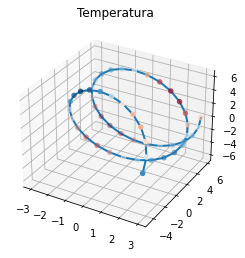

In [79]:
#Representacion de la curva
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

fig=plt.figure()
ax = fig.add_subplot(projection='3d')

# Prepare arrays x, y, z
t = np.linspace(0, 4*np.pi, 50)
 
x = 3 * np.cos(t)
y = 4 * np.log((t+1)/np.pi)
z =6.*np.sin(t)
Tdata=x*z+y

ax.plot(x, y, z, lw= 2)
sctt=ax.scatter3D(x, y, z, c=Tdata,marker='o', cmap='RdBu_r'),#cmap='viridis')#cmap='Greens')
# Add a color bar which maps values to colors.

plt.title("Temperatura")
#fig.colorbar(sctt,shrink=0.5,aspect=5) #no veo la razón por la que no va

plt.show()

Longitud aproximada=  59.621543598481736
error=  0.0191990822513759
Temperatura total aproximada=  156.97989382385057  error=  0.03103214875022786
Temperatura total aproximada=  156.97989382385057  error=  0.03103214875022786
Tmed=  2.63209153286689
[((2.63209153286689 - y)/z, y, z)]
(2.63209153286689 - y)/z
[]
[0.36283571]
[ True]


<ipython-input-123-6cfaed0c03a1>:86: RuntimeWarning: invalid value encountered in log
  y = 4 * np.log((tk+1)/np.pi)


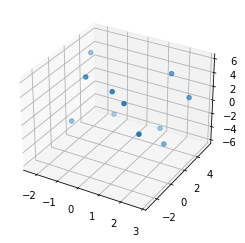

11 50


In [123]:
#Nuestra aproximacion numérica


n=140
a=0; b=4*np.pi
dt=(b-a)/n
pt=np.linspace(a,b,n+1)
ptm=pt+dt/2
xm=3.*np.cos(ptm);ym=4.*np.log((ptm+1)/np.pi);zm=6.*np.sin(ptm)
Tm=xm*zm+ym


def c(ti):
    return np.array([3.*np.cos(ti),4.*np.log((ti+1)/np.pi),6.*np.sin(ti)])

curve=[]
for ti in pt:
    curve.append(c(ti))
#print(curve)
def T(x,y,z):return x*z+y

from numpy import linalg as LA

#En el mismo bucle calculamos la longitud y la temperatura total
L_aprox=0.
T_aprox=0.
T_aprox1=0.
for i in range(0, n):
    segment=curve[i+1]-curve[i]
    norma=LA.norm(segment)
    L_aprox+=norma
    tm=(pt[i+1]+pt[i])/2

    T_aprox+= norma*T(c(tm)[0],c(tm)[1],c(tm)[2])
    T_aprox1+=norma*Tm[i]
print("Longitud aproximada= ", L_aprox)
print("error= ", np.abs(L-L_aprox))
print("Temperatura total aproximada= ", T_aprox, " error= ", np.abs(T_aprox-T1))
print("Temperatura total aproximada= ", T_aprox1, " error= ", np.abs(T_aprox1-T1))



Tmed=T_aprox/L
print("Tmed= ", Tmed)


import sympy as sp
"""En la variable t no es capar de hacerlo
x,y,z,t=sp.symbols('x,y,z,t')
c=[3*sp.cos(t), 4*sp.log((t+1)/sp.pi), 6*sp.sin(t)]
T= x*z+y
T=T.subs([(x,c[0] ),(y,c[1]),(z,c[2])    ])
eq=sp.Eq(T,Tmed)
print(eq)
ptos=sp.solve(eq,t)
"""
x,y,z=sp.symbols('x,y,z')
T=x*z+y
eq=sp.Eq(T,Tmed)
ptos=sp.solve(eq,x,y,z)
print(ptos)
fx=ptos[0][0]
print(fx)
gx=sp.lambdify([y,z],fx)

t = np.linspace(0.01, 4*np.pi, 50)
x=3*np.cos(t)
y = 4 * np.log((t+1)/np.pi)
z =6.*np.sin(t)

#Así me sale una lista vacía
x_ptos=[]
y_ptos=[]
z_ptos=[]
for i in range(0,len(t)):
    if np.abs(x[i] - gx(y[i],z[i]))<1.e-3: 
        x_ptos.append(x[i])
        y_ptos.append(y[i])
        z_ptos.append(z[i])

print( x_ptos)


def FT(tk): 
    x=3*np.cos(tk)
    y = 4 * np.log((tk+1)/np.pi)
    z =6.*np.sin(tk)
    return x*z+y-Tmed

from scipy.optimize import fsolve
#root=fsolve(FT,0.1)
#print(root)
#print(np.isclose(FT(root), 0.0))

x_ptos=[]
y_ptos=[]
z_ptos=[]

for i in range(0,len(t)):
    root=fsolve(FT,t[i])
    #if(np.isclose(FT(root), 0.0)):
    if(np.abs(FT(root))<1.e-15):
        x_ptos.append(x[i])
        y_ptos.append(y[i])
        z_ptos.append(z[i])

fig=plt.figure()
ax = fig.add_subplot(projection='3d')

sctt=ax.scatter3D(x_ptos, y_ptos, z_ptos,cmap='RdBu_r'),#cmap='viridis')#cmap='Greens')
# Add a color bar which maps values to colors.

plt.show()     
    
print(len(x_ptos),len(x))

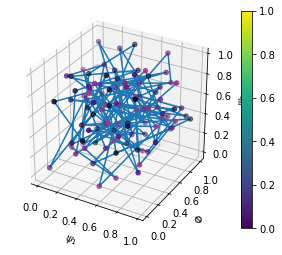

In [80]:
#Ejemplo de otra cosa
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

data = np.random.rand(3, 100)
x, y, z = data  # for show
c = np.arange(len(x)) / len(x)  # create some colours

p1 = ax.plot(x, y, z)
p = ax.scatter(x, y, z, c=plt.cm.magma(0.5*c))
ax.set_xlabel('$\psi_1$')
ax.set_ylabel('$\Phi$')
ax.set_zlabel('$\psi_2$')

ax.set_box_aspect([np.ptp(i) for i in data])  # equal aspect ratio

fig.colorbar(p, ax=ax)